In [2]:
import pandas as pd

In [4]:
import zipfile
import os

# Path to the zip file
zip_path = "titanic.zip"

# Directory to extract to (use the same name as the zip file without extension)
extract_dir = os.path.splitext(zip_path)[0]

# Create the directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
    
print(f"Successfully extracted {zip_path} to {extract_dir}/")

# List the extracted contents
print("\nExtracted files:")
for root, dirs, files in os.walk(extract_dir):
    level = root.replace(extract_dir, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    sub_indent = ' ' * 4 * (level + 1)
    for file in files:
        print(f"{sub_indent}{file}")

Successfully extracted titanic.zip to titanic/

Extracted files:
titanic/
    test.csv
    train.csv
    gender_submission.csv


In [16]:
df=pd.read_csv('titanic/train.csv')

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Method 1: Using fillna without inplace=True and reassigning
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Method 2: Using DataFrame-level fillna
df = df.fillna({
    'Age': df['Age'].median(),
    'Embarked': df['Embarked'].mode()[0]
})

# Drop the Cabin column
df.drop(columns=['Cabin'], inplace=True)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [23]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [24]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

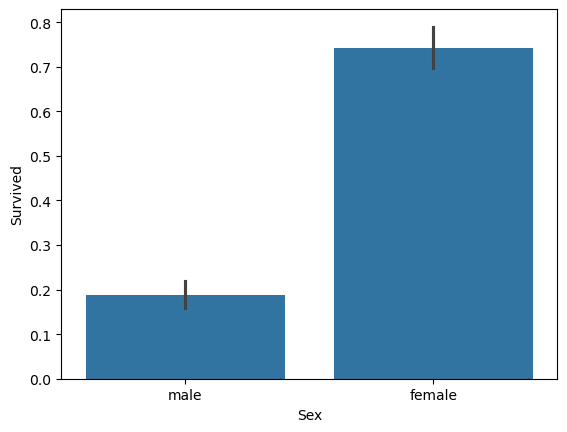

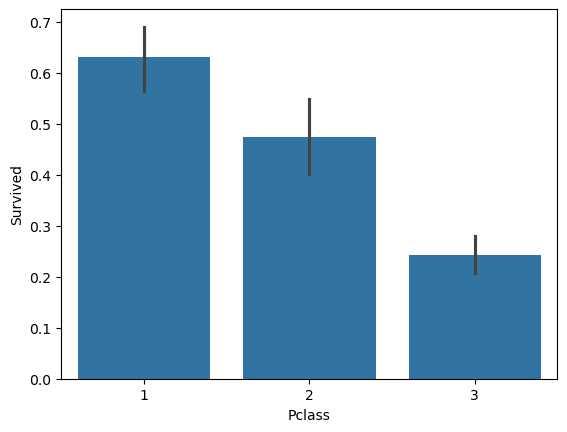

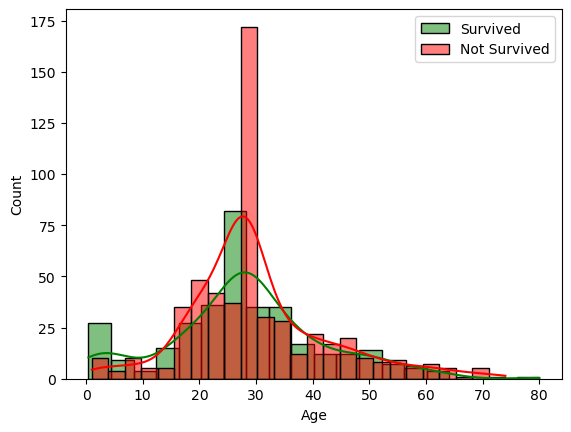

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender vs Survival
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

# Passenger Class vs Survival
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

# Age distribution of survivors vs non-survivors
sns.histplot(df[df['Survived']==1]['Age'], color="green", label="Survived", kde=True)
sns.histplot(df[df['Survived']==0]['Age'], color="red", label="Not Survived", kde=True)
plt.legend()
plt.show()
